In [2]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
!pip install --update scikit-learn


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --update


In [4]:
TRAIN_DIR = r'..\images\train'
TEST_DIR = r'..\images\validation'

In [5]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [6]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(train)

                                   image     label
0            ..\images\train\angry\0.jpg     angry
1            ..\images\train\angry\1.jpg     angry
2           ..\images\train\angry\10.jpg     angry
3        ..\images\train\angry\10002.jpg     angry
4        ..\images\train\angry\10016.jpg     angry
...                                  ...       ...
19682  ..\images\train\surprise\9969.jpg  surprise
19683  ..\images\train\surprise\9985.jpg  surprise
19684  ..\images\train\surprise\9990.jpg  surprise
19685  ..\images\train\surprise\9992.jpg  surprise
19686  ..\images\train\surprise\9996.jpg  surprise

[19687 rows x 2 columns]


In [8]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
happy completed
neutral completed
sad completed
surprise completed


In [9]:
print(test)
print(test['image'])

                                       image     label
0       ..\images\validation\angry\10052.jpg     angry
1       ..\images\validation\angry\10065.jpg     angry
2       ..\images\validation\angry\10079.jpg     angry
3       ..\images\validation\angry\10095.jpg     angry
4       ..\images\validation\angry\10121.jpg     angry
...                                      ...       ...
5932  ..\images\validation\surprise\9806.jpg  surprise
5933  ..\images\validation\surprise\9830.jpg  surprise
5934  ..\images\validation\surprise\9853.jpg  surprise
5935  ..\images\validation\surprise\9878.jpg  surprise
5936   ..\images\validation\surprise\993.jpg  surprise

[5937 rows x 2 columns]
0         ..\images\validation\angry\10052.jpg
1         ..\images\validation\angry\10065.jpg
2         ..\images\validation\angry\10079.jpg
3         ..\images\validation\angry\10095.jpg
4         ..\images\validation\angry\10121.jpg
                         ...                  
5932    ..\images\validation\surp

In [10]:
from tqdm.notebook import tqdm

In [11]:
from keras_preprocessing.image import load_img

def extract_features(images):
    features = []
    for image in tqdm(images):
        # Load image with desired size (100x100) and grayscale mode
        img = load_img(image, target_size=(100, 100), color_mode='grayscale')
        img_array = np.array(img)  # Convert image to numpy array
        features.append(img_array)
    features = np.array(features)  # Convert list of arrays to numpy array
    features = features.reshape(len(features), 100, 100, 1)  # Reshape to (num_samples, height, width, channels)
    return features

In [12]:
train_features = extract_features(train['image'])

  0%|          | 0/19687 [00:00<?, ?it/s]

In [13]:
test_features = extract_features(test['image'])

  0%|          | 0/5937 [00:00<?, ?it/s]

In [14]:
x_train = train_features/255.0
x_test = test_features/255.0

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [17]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [18]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [19]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(100,100,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [20]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [21]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100


ValueError: in user code:

    File "c:\Users\dhyan\miniconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\dhyan\miniconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\dhyan\miniconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\dhyan\miniconda3\envs\ML\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\dhyan\miniconda3\envs\ML\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\dhyan\miniconda3\envs\ML\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 48, 48, 1), found shape=(None, 100, 100, 1)


In [ ]:
model_json = model.to_json()
with open("emotiondetector3.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector3.h5")

from keras.models import model_from_json

In [ ]:
from keras.models import model_from_json

In [ ]:
json_file = open("emotiondetector3.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector3.h5")

In [ ]:
label = ['angry','happy','neutral','sad','surprise']

In [ ]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [ ]:
image = r'images\train\sad\42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


FileNotFoundError: [Errno 2] No such file or directory: 'images\\train\\sad\\42.jpg'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad


c:\Users\dhyan\miniconda3\envs\py3.7\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


FileNotFoundError: [Errno 2] No such file or directory: 'images/train/sad/42.jpg'

In [ ]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear


FileNotFoundError: [Errno 2] No such file or directory: 'images/train/fear/2.jpg'

In [ ]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust


FileNotFoundError: [Errno 2] No such file or directory: 'images/train/disgust/299.jpg'

In [ ]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy


FileNotFoundError: [Errno 2] No such file or directory: 'images/train/happy/7.jpg'

In [ ]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise


FileNotFoundError: [Errno 2] No such file or directory: 'images/train/surprise/15.jpg'

In [ ]:
predictions = model.predict(x_test)
pred_labels = [label[pred.argmax()] for pred in predictions]
pred_labels = np.array(pred_labels)
test["pred_label"] = pred_labels

186/186 [==============================] - 6s 31ms/step


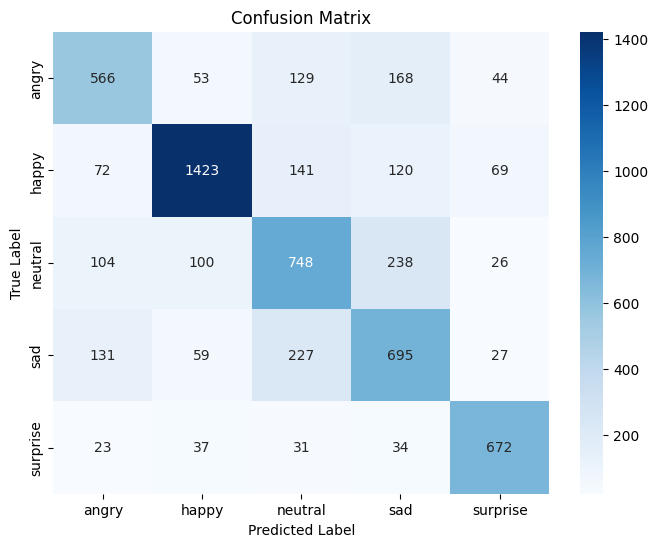

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(test['label'], test['pred_label'])

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()